In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from solvers.rd import RD_2D_1st_Order as RDSolver
from solvers.rd import Neumann_Boundary_2D
from solvers.rd import Dirichlet_Boundary_2D
from solvers.rd import Periodic_Boundary_2D

### Solvig a two-dimensional Brusselator reaction diffusion model

Let us assume we need to solve the following PDEs

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

with parameters.
- $D_u = 0.01, \quad D_v=1.0$.
- $A = 1.0$.
- $B = 1.5$.
We solve these PDEs on a $(4, 4)$ domain divided into a $64 \times 64$ points mesh. In addition, the integration time step we select will be $0.05$ and the Neuman boundary condition.

To do that, we must first create a solver integrator below. Note that we specify the diffusion constant when creating the RDSolver for the Diffusion part of the PDEs. For species that do not diffuse, use zero diffusion coefficient. 

In [2]:
delta_t = 0.01
Lx = Ly = 4.0
D_U, D_V = 0.01, 1.0
solver = RDSolver(Ds=[D_U, D_V], 
                  delta_t=delta_t, 
                  Lx=Lx, Ly=Ly, 
                  Ix=64, Jy=64,
                  boundary_condition=Neumann_Boundary_2D)

Next, we need to write the PDF function. This function excludes the diffusion part, which is usually called kinetic terms.

In [3]:
A, B = 1.0, 1.5
def brusselator_kinetic(u, v):
    fu = A - (B + 1) * u + u* u * v
    fv = B * u - u* u * v
    return (fu, fv)

We specified the boundary condition when we created the solver object. However, to solve PDEs, we need to provide an initial condition.

The initial condition will be a fixed point of the system with added Gaussian noise. The fixed point of the Brussolator model is $(u^*, v^*) = (A, B/A)$, and we add noise by sampling from a Normal distribution as follows.

In [4]:
initial_u = A * np.ones((64, 64)) 
initial_u += np.random.normal(scale=.01, size=(64, 64))

initial_v = (B/A) * np.ones((64, 64)) 
initial_v += np.random.normal(scale=.01, size=(64, 64))

Finally, we integrate the model for $10$ units of time. Note that since we specified $\Delta t$ as $1^{-2}$, every $100$ steps equals one unit of time. Therefore, to integrate for $100$, we must integrate for $100 \times 100$ steps. Also, we do not need all the integration steps but ten of them. Thus, `record_steps` must be 100.

Notice that we must flatten the initial condition arrays before integerating.

In [5]:
steps = 10000
solutions = solver.integrate([initial_u.flatten(), 
                              initial_v.flatten()] ,
                              brusselator_kinetic,
                              steps,
                              record_steps=100)


We plot that last time step by rehsaping it to a $64 \times 64$ array.

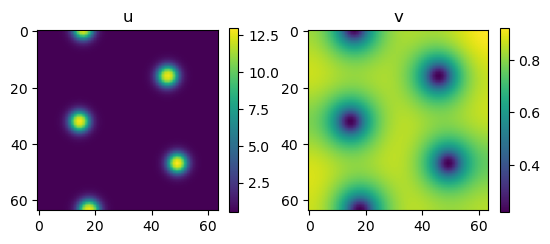

In [6]:
u_n = solutions[-1, 0, :].reshape((64,64))
v_n = solutions[-1, 1, :].reshape((64,64))

plt.subplot(121)
plt.imshow(u_n)
plt.colorbar(shrink=.5)
plt.title("u")
plt.subplot(122)
plt.imshow(v_n)
plt.colorbar(shrink=.5)
plt.title("v")
plt.show()